# Neural Networks

## Introduction



In [19]:
%pip install gensim

import numpy as np
import matplotlib.pyplot as plt
import gensim.downloader as gensim_api
model = gensim_api.load("glove-wiki-gigaword-100")
print(type(model))

Note: you may need to restart the kernel to use updated packages.
<class 'gensim.models.keyedvectors.KeyedVectors'>


In [7]:
model["boyko"]

array([-0.061317 , -0.36094  , -0.36548  , -0.25828  , -0.11853  ,
       -0.57739  , -0.76675  ,  0.072464 ,  0.47613  ,  0.51472  ,
       -0.23579  , -0.56821  , -0.39761  ,  0.05397  ,  0.12619  ,
       -0.12107  , -0.25077  ,  0.20651  , -0.10903  ,  0.16447  ,
       -0.79442  , -0.30587  ,  0.15222  , -0.049124 ,  0.38954  ,
       -0.052713 ,  1.1981   ,  0.52737  , -0.11879  ,  0.013217 ,
       -0.25237  , -0.16639  , -0.096652 ,  0.69608  , -0.23204  ,
        0.37207  ,  0.19146  ,  0.22414  , -0.17315  ,  0.15853  ,
        0.88603  , -0.0031518,  0.53889  ,  0.39149  , -0.14801  ,
       -0.39768  , -0.14536  , -0.48576  ,  0.61596  ,  0.77713  ,
        0.24226  , -0.58145  ,  0.45457  ,  0.6419   , -0.67103  ,
        0.6658   , -0.20279  ,  0.673    , -0.40446  , -0.059336 ,
        0.41331  , -0.99265  ,  0.1447   , -0.091476 ,  0.11593  ,
        0.56627  , -0.051822 , -0.14467  , -0.41268  , -0.48985  ,
       -0.31178  ,  0.0092476, -0.43849  , -0.081738 , -0.3376

In [8]:
model.most_similar("bulgaria")

[('romania', 0.886336088180542),
 ('hungary', 0.8389860391616821),
 ('ukraine', 0.8092954754829407),
 ('lithuania', 0.7841966152191162),
 ('latvia', 0.7808158993721008),
 ('albania', 0.7778776288032532),
 ('moldova', 0.7754804491996765),
 ('greece', 0.7619103193283081),
 ('armenia', 0.7605524659156799),
 ('slovakia', 0.7601156234741211)]

In [9]:
model.most_similar("pike")

[('elk', 0.6156542301177979),
 ('brook', 0.5954383611679077),
 ('creek', 0.5603740215301514),
 ('benton', 0.5585354566574097),
 ('cumberland', 0.5523167252540588),
 ('jasper', 0.5395222306251526),
 ('perch', 0.5297390818595886),
 ('grove', 0.5274513363838196),
 ('beaver', 0.5258278846740723),
 ('moose', 0.5208967328071594)]

In [10]:
# King - Man + Woman = Queen?

result = model.most_similar(positive = ["woman", "king"], negative = ["man"])
result

[('queen', 0.7698541283607483),
 ('monarch', 0.6843380928039551),
 ('throne', 0.6755736470222473),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534157752991),
 ('prince', 0.6517035365104675),
 ('elizabeth', 0.6464517712593079),
 ('mother', 0.6311717629432678),
 ('emperor', 0.6106470823287964),
 ('wife', 0.6098655462265015)]

In [11]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative = [x1])
    return result[0][0]

analogy("man", "king", "woman")

'queen'

In [12]:
analogy("king", "man", "queen")

'woman'

In [13]:
analogy("germany", "beer", "france")

'wine'

In [14]:
analogy("obama", "clinton", "reagan")

'nixon'

In [20]:
from sklearn.manifold import TSNE

def plot_vecs_2d(words):
    "Creates and TSNE model and plots it"
    
    vecs = model[words]

    tsne_mod = TSNE(perplexity=2, n_components=2, init='pca', n_iter=3000, random_state=37)
    new_values = tsne_mod.fit_transform(vecs)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(words[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/home/amarov/anaconda3/envs/ta2024/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


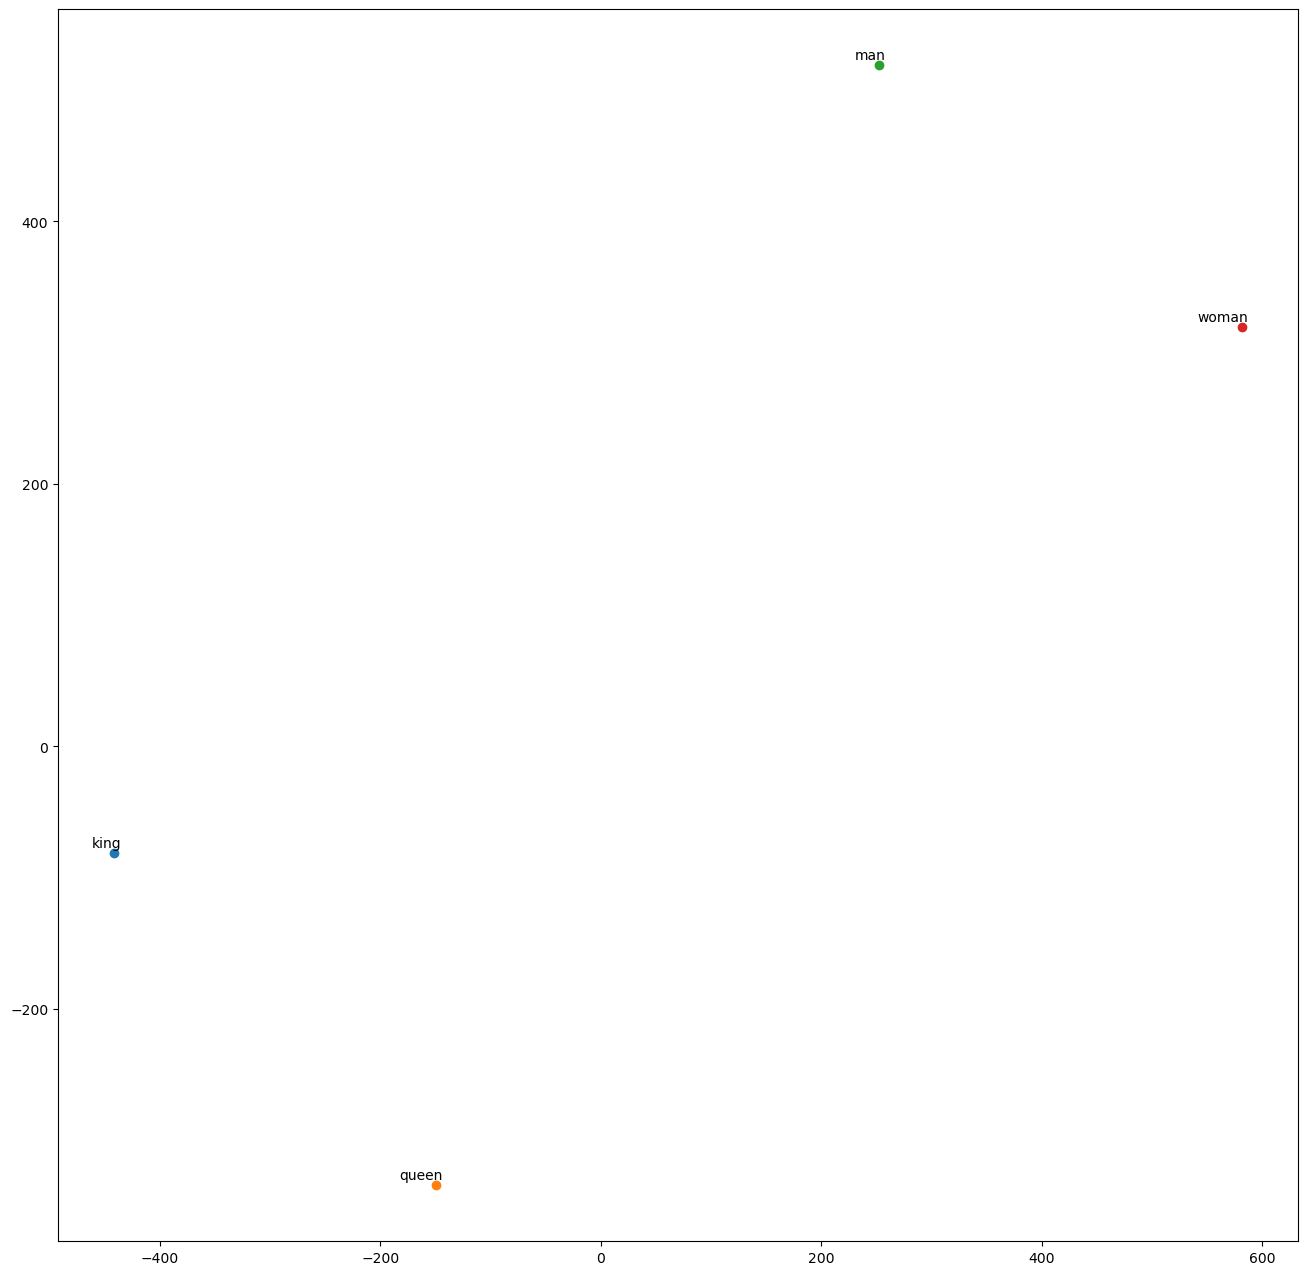

In [22]:
plot_vecs_2d(words = np.array(["king", "queen", "man", "woman"]))

/home/amarov/anaconda3/envs/ta2024/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


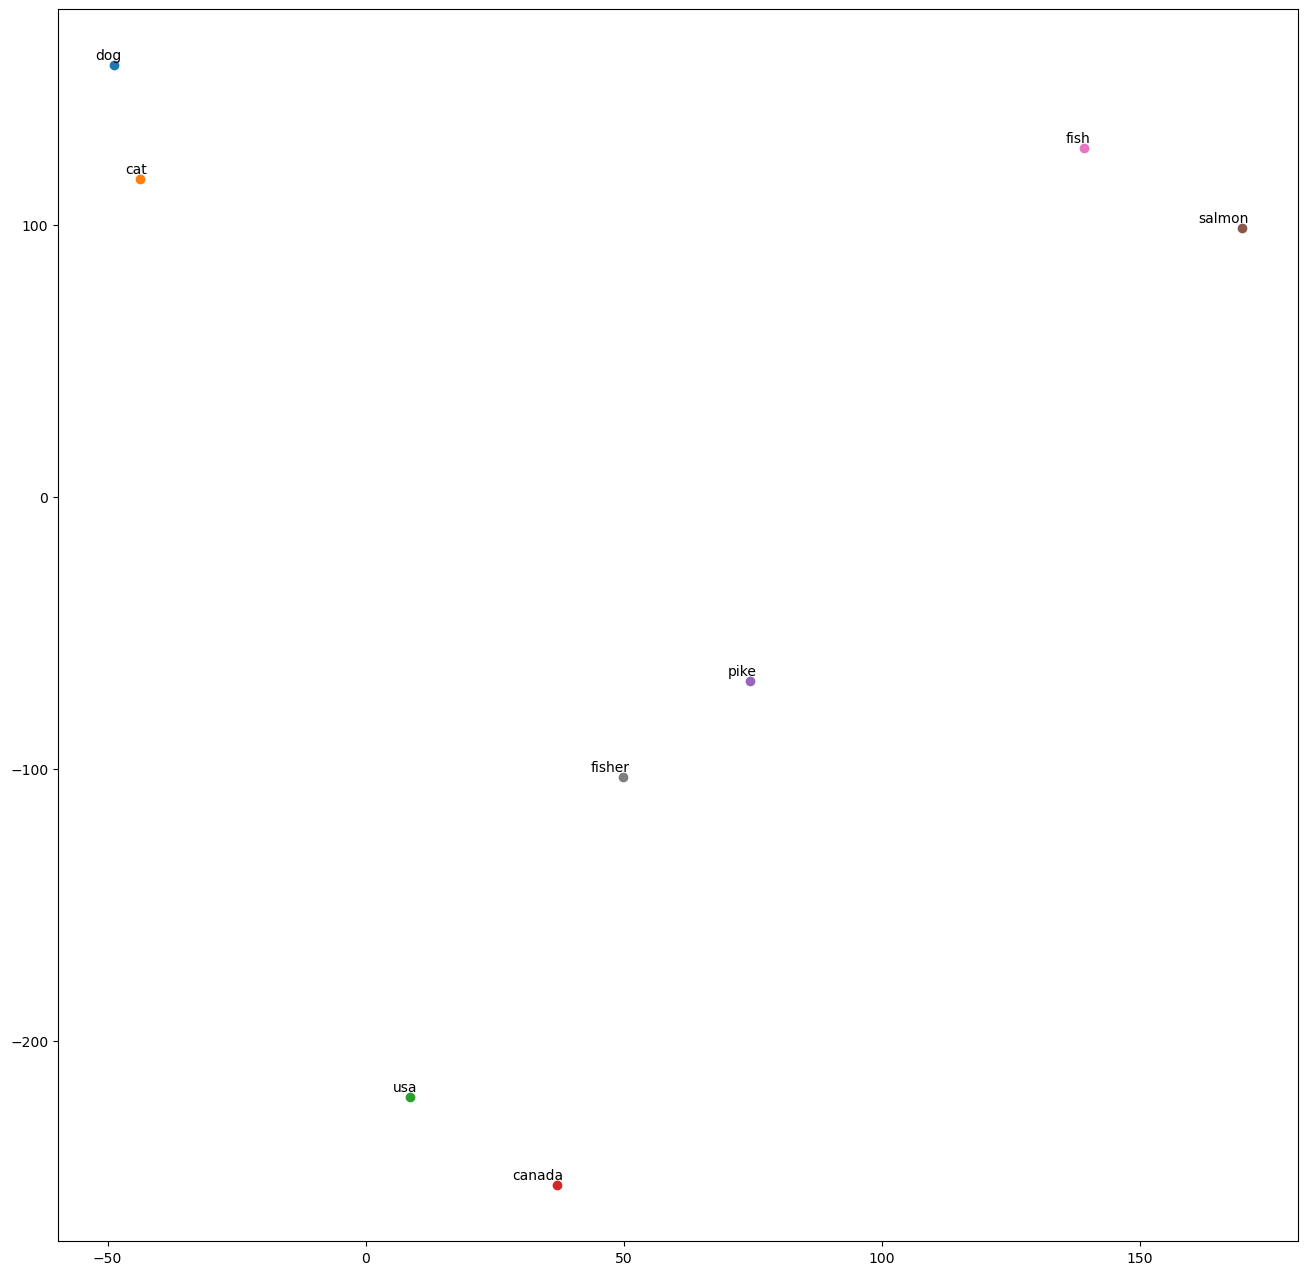

In [21]:
plot_vecs_2d(words = ["dog", "cat", "usa", "canada", "pike", "salmon", "fish", "fisher"])

The idea:
- Take a large body (corpus) of text
- Map every word in that corpus to a (dense) vector of a fixed dimension (e.g., 100)
- Take each word (center word, c) in the text and try to predict the words that appear close to it in the text (context words, o)
- Use the *similarity* of the word vectors for c and o to calculate the probability of o given c
- Keep moving to the next word and adjust the word vectors to maximize this probability


Let's see an example.

$$
m = 2
$$

- **She** said Wednesday | that she will “definitely debut” another new skill, a Yurchenko double pike on vault, before Tokyo.
- |She **said** Wednesday that | she will “definitely debut” another new skill, a Yurchenko double pike on vault, before Tokyo.
- |She said **Wednesday** that she | will “definitely debut” another new skill, a Yurchenko double pike on vault, before Tokyo.

![Word2Vec Diagram](https://miro.medium.com/v2/1*cuOmGT7NevP9oJFJfVpRKA.png)

## Gradient Descent

Gradient descent is a widely used optimization algorithm in machine learning.

Let us look at a simple function, e.g.:

$$
f(x) = 5 + 2 * x^2
$$

We can find the minimum of this function by taking the derivative of the function and setting it to zero:

$$
f'(x) = 4 * x
$$

$$
4 * x = 0
$$

$$
x = 0
$$

So, the minimum of the function is at $x = 0$ (check the sufficient condition for minimum as a homework).


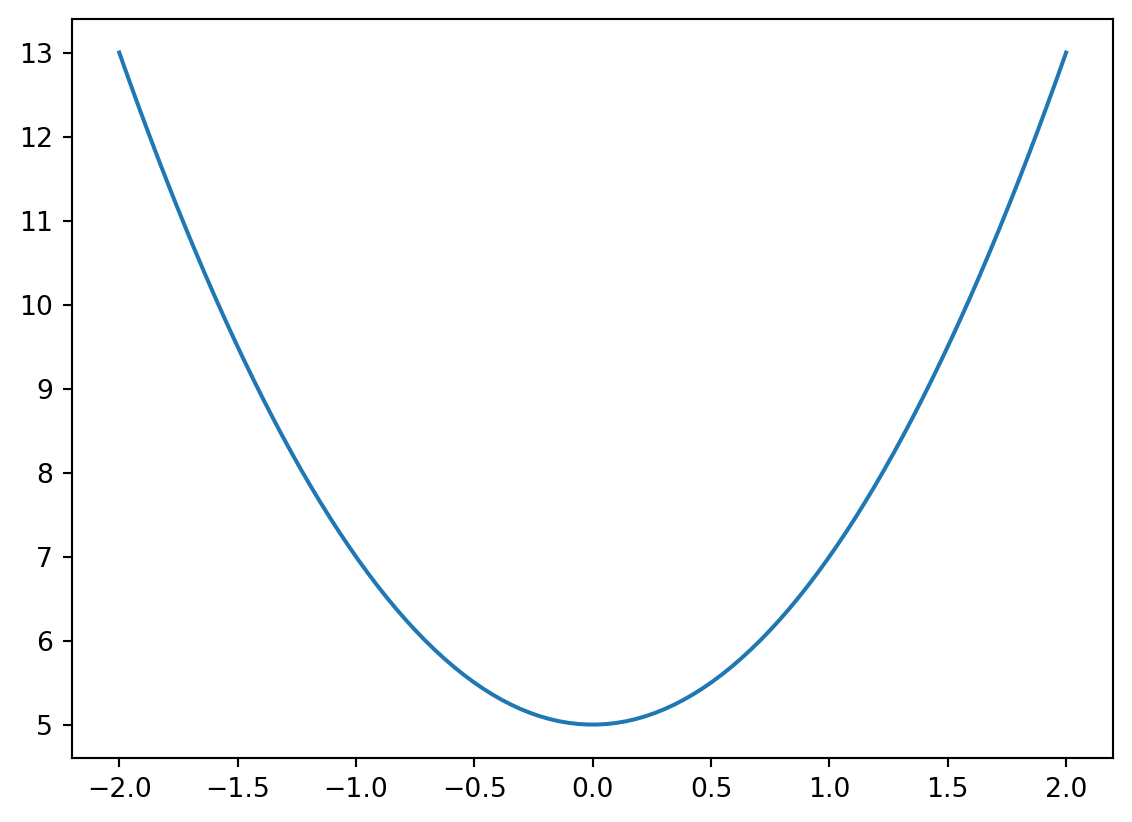

In [2]:

def simple_func(x: np.ndarray) -> float:
    return 5 + 2 * x ** 2

x = np.linspace(-2, 2, 100)
y = simple_func(x)

plt.plot(x, y)
plt.show()


In this simple example we have picked a rather convenient function but in practice we may be dealing with really complex functions where it is not possible to find the minimum analytically. This is the use case of gradient descent.

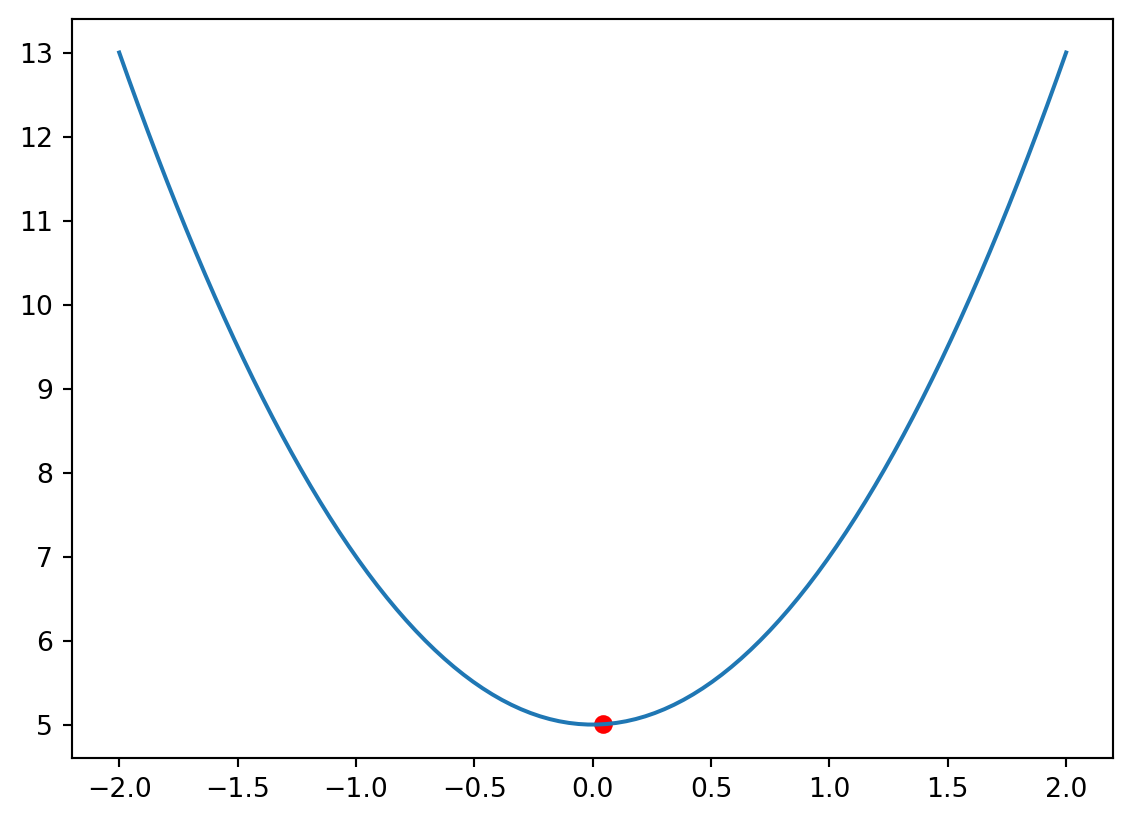

In [3]:
# Let's pick a random point
x0 = np.random.uniform(-2, 2)
y0 = simple_func(x0)

# Let's plot the function and the point

plt.plot(x, y)
plt.scatter(x0, y0, color='red')
plt.show()

In [4]:
# And let's compute the gradient at that point

def simple_func_grad(x: np.ndarray) -> float:
    return 4 * x

x0_grad = simple_func_grad(x0)
x0_grad

0.1751676866204761


The gradient is non-zero, so we can move in the opposite direction of the gradient to get closer to the minimum

$$
x_{n+1} = x_n - \alpha f'(x_n)
$$

where $\alpha$ is the learning rate. Let us set $\alpha = 0.1$.

In our case the next value of $x$ will be:

$$
x_{n+1} = x_n - \alpha 4 x_n
$$


Starting at x0 = 0.04, y0 = 5.00
Move to x1 = 0.03, y1 = 5.00


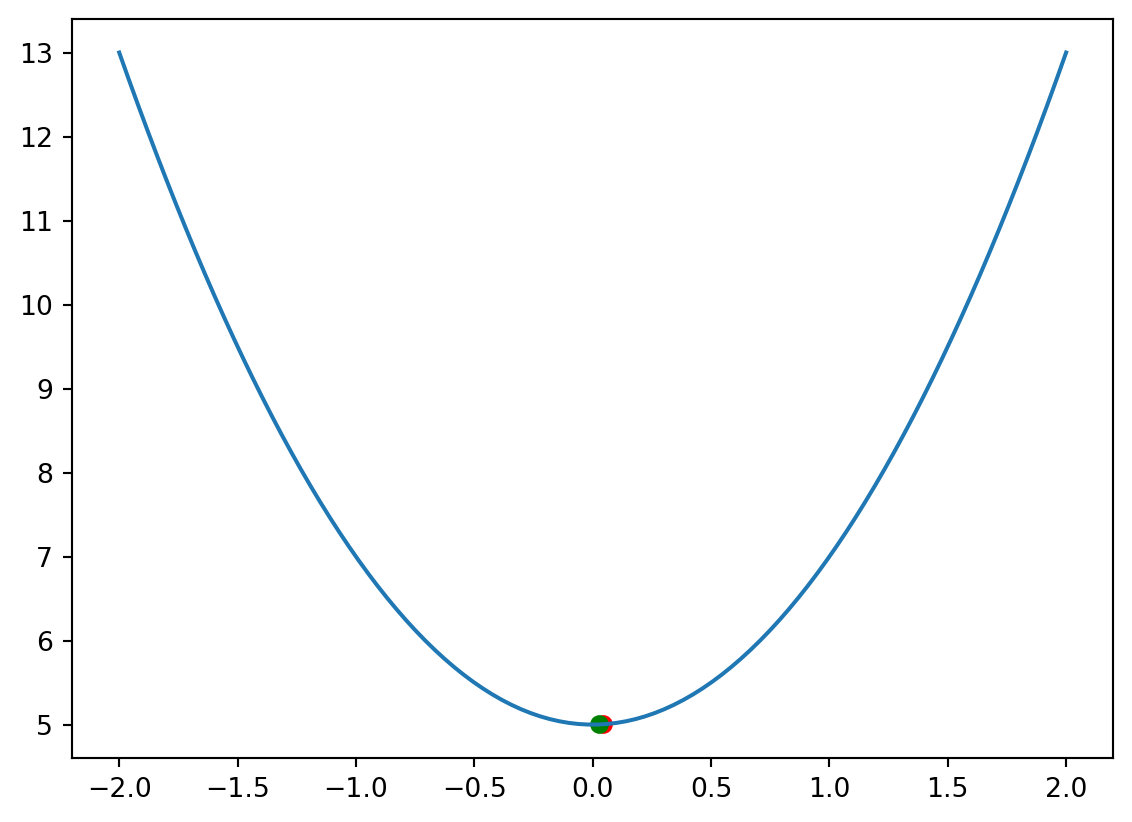

In [5]:
x1 = x0 - 0.1 * x0_grad
y1 = simple_func(x1)

print("Starting at x0 = {:.2f}, y0 = {:.2f}".format(x0, y0))
print("Move to x1 = {:.2f}, y1 = {:.2f}".format(x1, y1))

plt.plot(x, y)
plt.scatter(x0, y0, color='red')
plt.scatter(x1, y1, color='green')
plt.show()


The gradient is still positive, so we need to update $x$ again:

$$
x_{n+2} = x_{n+1} - \alpha 4 x_{n+1}
$$

Starting at x1 = 0.03, y1 = 5.00
Move to x2 = 0.02, y2 = 5.00


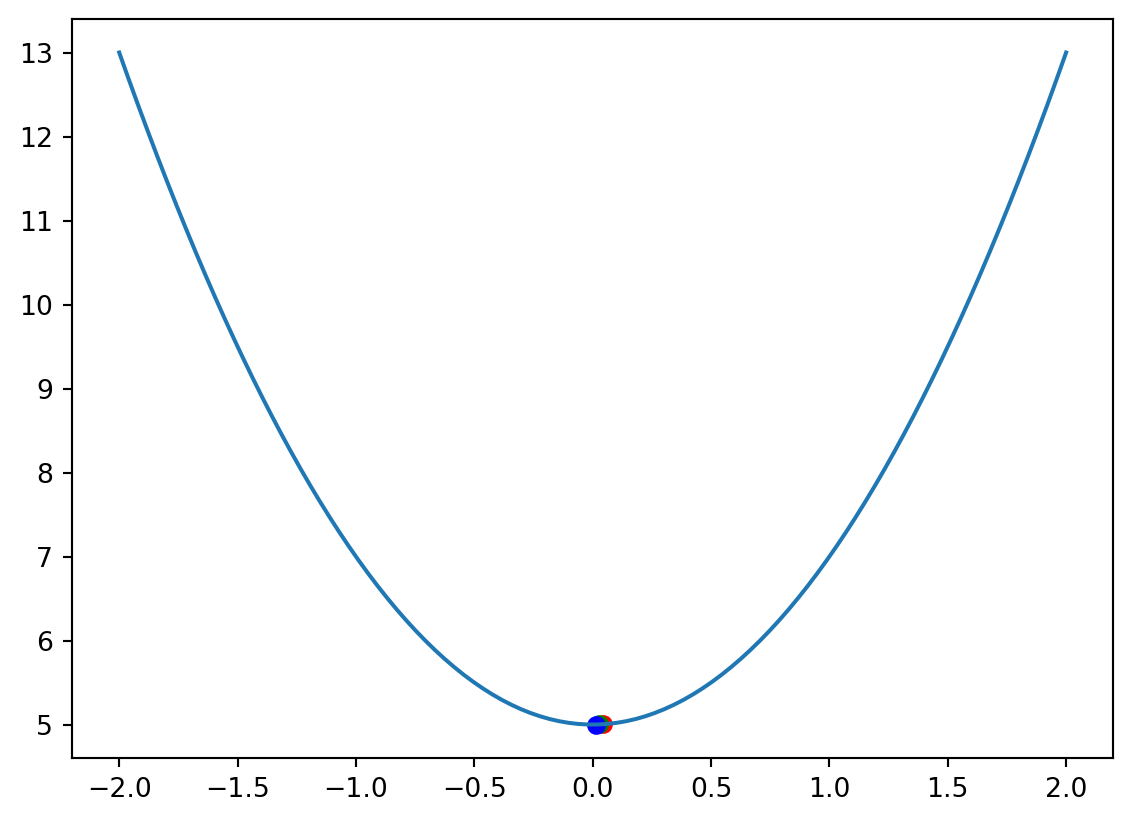

In [6]:
x2 = x1 - 0.1 * simple_func_grad(x1)
y2 = simple_func(x2)

print("Starting at x1 = {:.2f}, y1 = {:.2f}".format(x1, y1))
print("Move to x2 = {:.2f}, y2 = {:.2f}".format(x2, y2))

plt.plot(x, y)
plt.scatter(x0, y0, color='red')
plt.scatter(x1, y1, color='green')
plt.scatter(x2, y2, color='blue')
plt.show()


Notice that the steps we are taking are getting smaller as we approach the minimum (because the gradient is getting smaller).


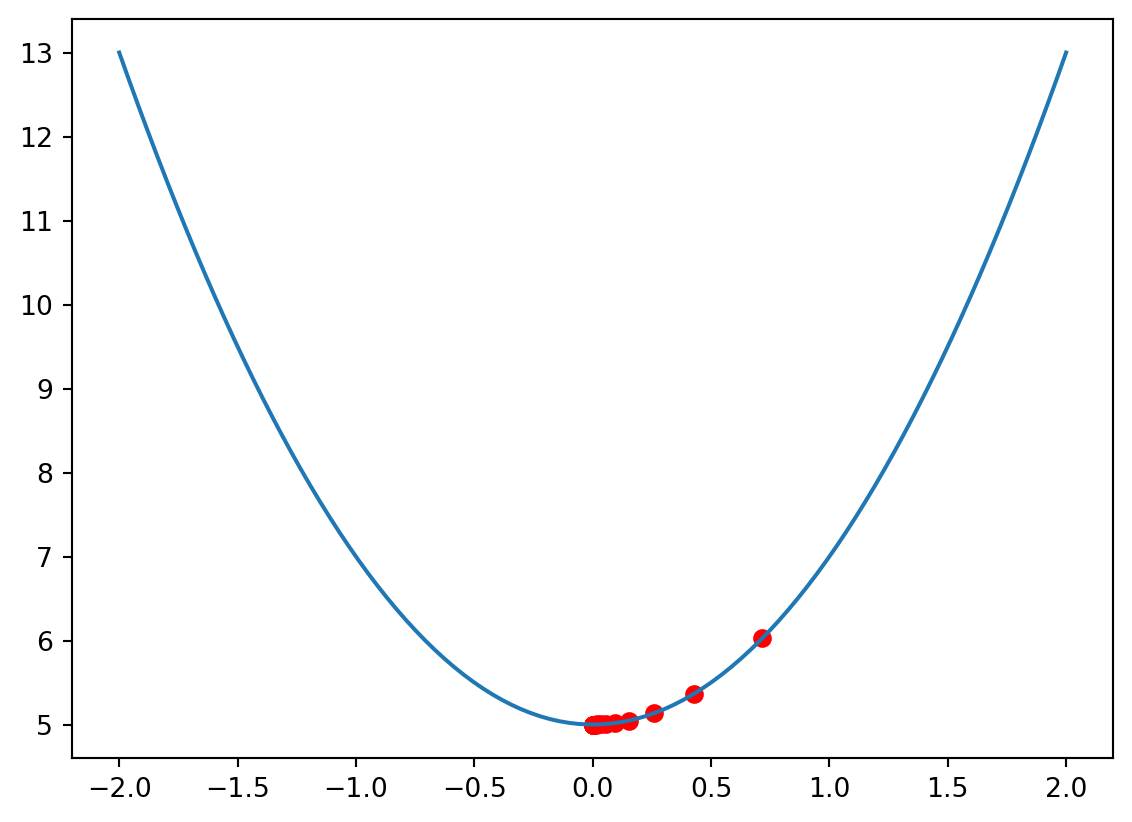

In [7]:
# Now let us do this in a loop

x0 = np.random.uniform(-2, 2)
y0 = simple_func(x0)
lr = 0.1

x_lst = [x0]
y_lst = [y0]

for i in range(15):
    x1 = x0 - lr * simple_func_grad(x0)
    y1 = simple_func(x1)
    # print("Starting at x0 = {:.2f}, y0 = {:.2f}".format(x0, y0))
    # print("Move to x1 = {:.2f}, y1 = {:.2f}".format(x1, y1))
    
    # Store the intermediate results for plotting
    x_lst.append(x1)
    y_lst.append(y1)
    
    x0 = x1
    y0 = y1
    
plt.plot(x, y)
plt.scatter(x_lst, y_lst, color='red')
plt.show()


## Two Dimensional Example

Let us look at a two-dimensional example:

$$
f(x, y) = 5 + 2 x^2 + 3 (y - 2)^2
$$

with a gradient:

$$
\nabla f = \begin{bmatrix} 4 x \\ 6 (y - 2) \end{bmatrix}
$$

We can find the minimum of this function by taking the derivative of the function and setting it to zero:

$$
\frac{\partial f}{\partial x} = 4 x = 0 \\
\frac{\partial f}{\partial y} = 6 (y - 2) = 0
$$

So the minimum is at:

$$
x = 0 \\
y = 2
$$

and the minimum value is:

$$
f(0, 2) = 5 + 2 \cdot 0^2 + 3 (2 - 2)^2 = 5
$$

In [8]:
def f2d(x: np.ndarray, y: np.ndarray) -> float:
    return 5 + 2 * x ** 2 + 3 * (y - 2) ** 2


def f2d_grad(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    return np.array([4 * x, 6 * (y - 2)])

f2d(0, 2)

5

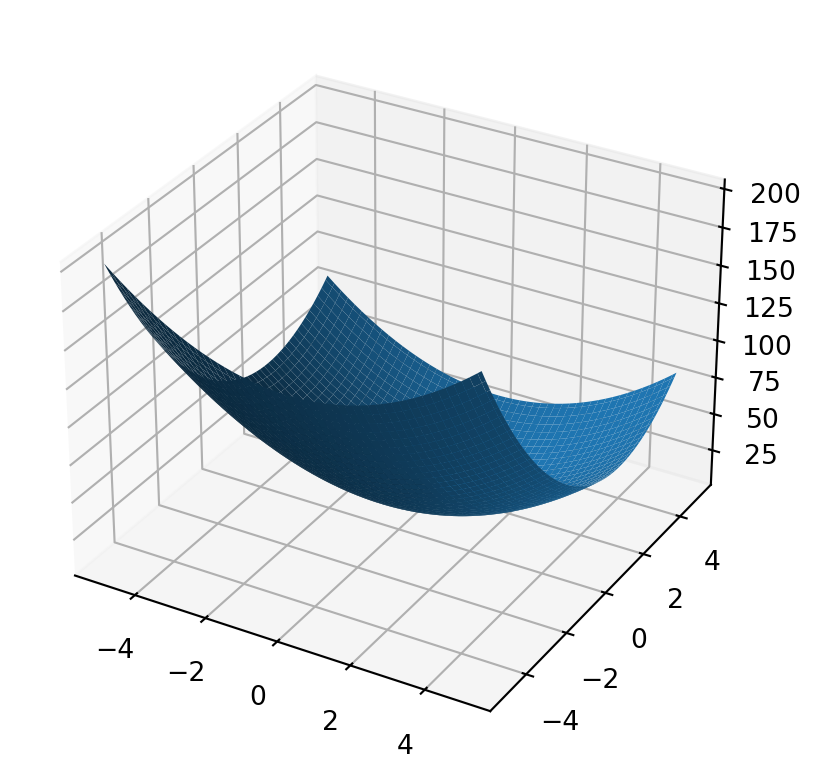

In [9]:
# Let's plot this function

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)
Z = f2d(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()


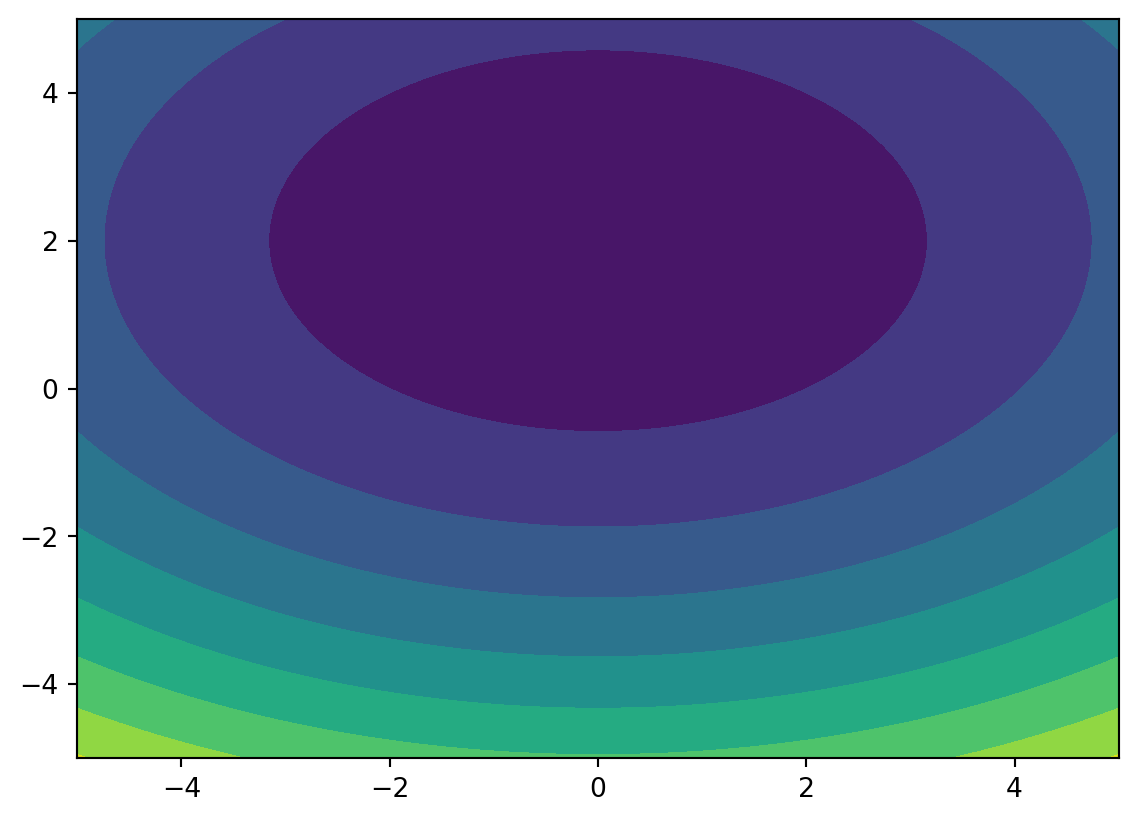

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(X, Y, Z)
plt.show()

In [11]:
# Now we pick a random point

x0 = np.random.uniform(-5, 5)
y0 = np.random.uniform(-5, 5)

z0 = f2d(x0, y0)

# The gradient at that point

f2d_grad(x0, y0)


array([16.66897266, 15.25096725])

Starting at x0 = 4.17, y0 = 4.54, z0 = 59.11
Move to x1 = 2.50, y1 = 5.00, z1 = 44.50


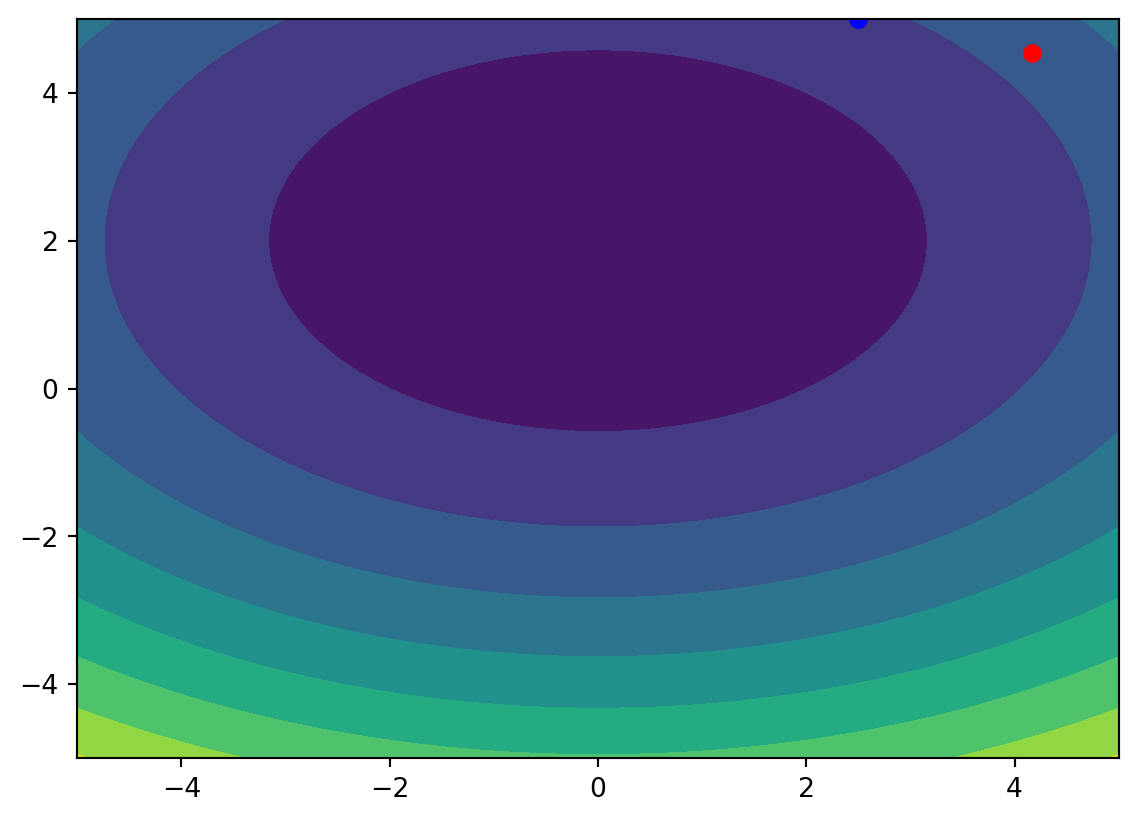

In [12]:
# The gradient is non-zero in both directions and is steeper in the y direction

x1 = x0 - 0.1 * f2d_grad(x0, y0)[0]
y2 = y0 - 0.1 * f2d_grad(x0, y0)[1]

z1 = f2d(x1, y1)

print("Starting at x0 = {:.2f}, y0 = {:.2f}, z0 = {:.2f}".format(x0, y0, z0))
print("Move to x1 = {:.2f}, y1 = {:.2f}, z1 = {:.2f}".format(x1, y1, z1))

# Make a countour plot

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(X, Y, Z)
plt.scatter(x0, y0, color='red')
plt.scatter(x1, y1, color='blue')
plt.show()

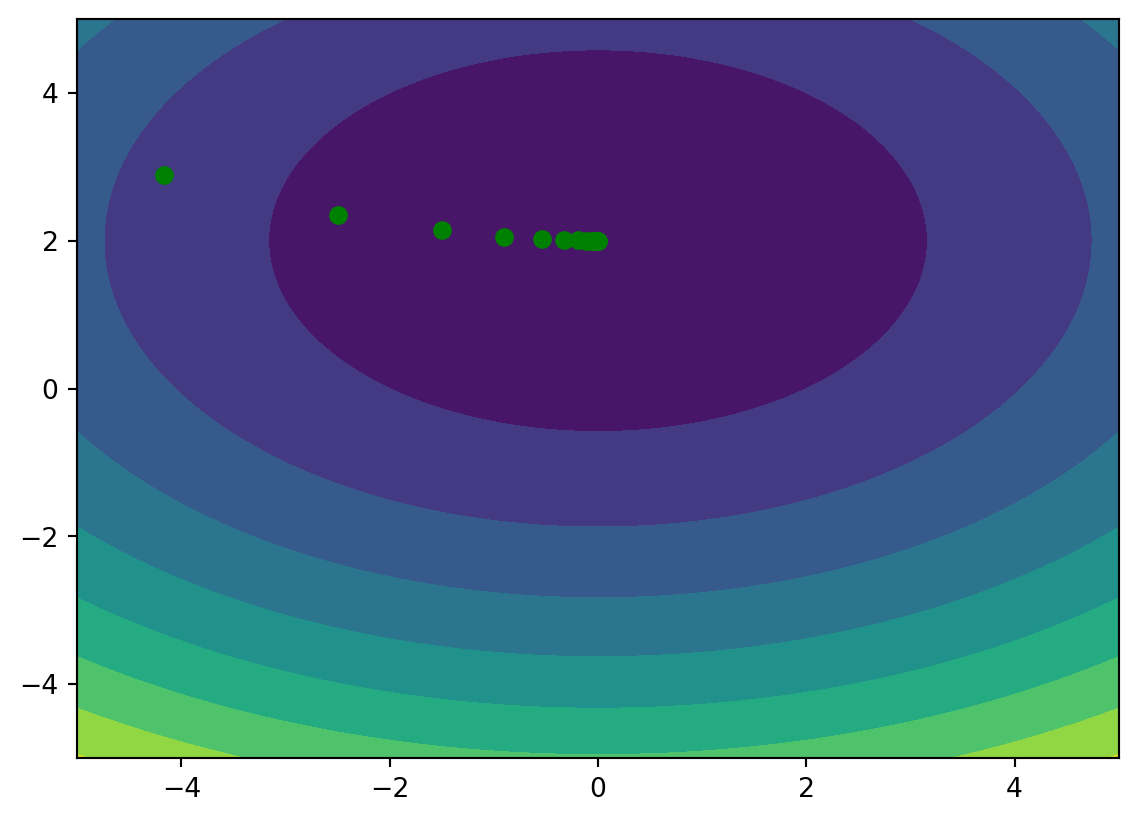

In [13]:
x0 = np.random.uniform(-5, 5)
y0 = np.random.uniform(-5, 5)
z0 = f2d(x0, y0)

lr = 0.1

x_lst = [x0]
y_lst = [y0]
z_lst = [z0]

for i in range(15):
    x1 = x0 - lr * f2d_grad(x0, y0)[0]
    y1 = y0 - lr * f2d_grad(x0, y0)[1]
    z1 = f2d(x1, y1)
    
    # print("Starting at x0 = {:.2f}, y0 = {:.2f}, z0 = {:.2f}".format(x0, y0, z0))
    # print("Move to x1 = {:.2f}, y1 = {:.2f}, z1 = {:.2f}".format(x1, y1, z1))
    
    x_lst.append(x1)
    y_lst.append(y1)
    z_lst.append(z1)
    
    x0 = x1
    y0 = y1
    z0 = z1    
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(X, Y, Z)
ax.scatter(x_lst, y_lst, color='green')
plt.show()